In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/ds_Amgoth_Naresh/csv_files/"

hist_path = base_path + "historical_data.csv"
fg_path   = base_path + "fear_greed_index.csv"

import pandas as pd
hist = pd.read_csv(hist_path)
fg   = pd.read_csv(fg_path)

print("Historical Trader Data:", hist.shape)
print("Fear & Greed Index:", fg.shape)


Historical Trader Data: (211224, 16)
Fear & Greed Index: (2644, 4)


In [4]:
# Look at first few rows
display(hist.head(5))
display(fg.head(5))

# Summary of data
print("\n--- Historical Trader Data Info ---")
print(hist.info())
print(hist.describe(include='all').T)

print("\n--- Fear & Greed Index Info ---")
print(fg.info())
print(fg['classification'].value_counts())


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



--- Historical Trader Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-nu

In [5]:
import pandas as pd
# Trader data timestamp (in ms → ns)
hist['Timestamp'] = pd.to_datetime(hist['Timestamp'], unit='ms')

# Fear & Greed timestamp (in s → ns)
fg['timestamp'] = pd.to_datetime(fg['timestamp'], unit='s')

# Add date columns
hist['date'] = hist['Timestamp'].dt.date
fg['date'] = pd.to_datetime(fg['date']).dt.date

# Merge on date
merged_df = hist.merge(fg[['date','classification','value']], on='date', how='left')

# Quick check
print(merged_df[['Timestamp','Coin','Size USD','Side','classification','value']].head())


            Timestamp  Coin  Size USD Side classification  value
0 2024-10-27 03:33:20  @107   7872.16  BUY          Greed   74.0
1 2024-10-27 03:33:20  @107    127.68  BUY          Greed   74.0
2 2024-10-27 03:33:20  @107   1150.63  BUY          Greed   74.0
3 2024-10-27 03:33:20  @107   1142.04  BUY          Greed   74.0
4 2024-10-27 03:33:20  @107     69.75  BUY          Greed   74.0


In [6]:
print(merged_df.shape)

(211224, 19)


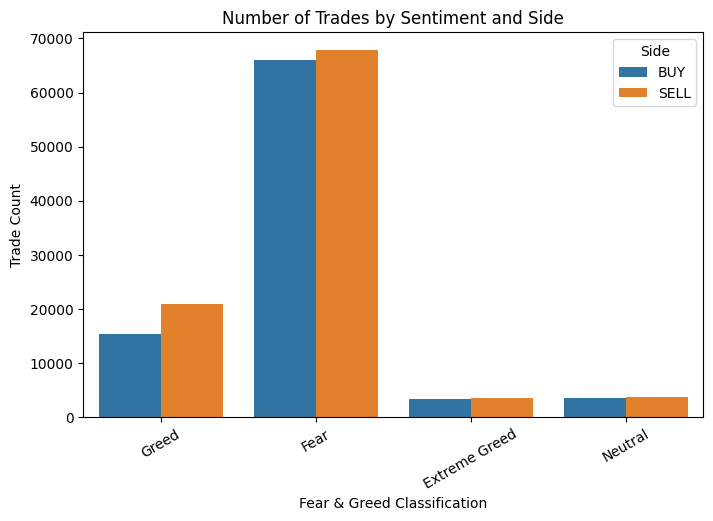

Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/trades_by_sentiment_side.png


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define output path inside Google Drive
output_dir = "/content/drive/MyDrive/ds_Amgoth_Naresh/outputs"
os.makedirs(output_dir, exist_ok=True)

# Plot
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x="classification", hue="Side")
plt.title("Number of Trades by Sentiment and Side")
plt.xlabel("Fear & Greed Classification")
plt.ylabel("Trade Count")
plt.xticks(rotation=30)

# Save directly to Google Drive folder
file_path = os.path.join(output_dir, "trades_by_sentiment_side.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Plot saved to: {file_path}")


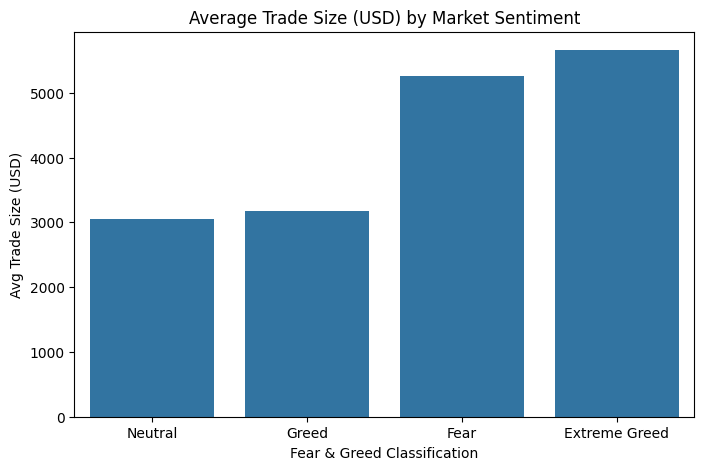

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/avg_trade_size_by_sentiment.png


In [8]:
avg_size = merged_df.groupby("classification")["Size USD"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_size.index, y=avg_size.values)
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.ylabel("Avg Trade Size (USD)")
plt.xlabel("Fear & Greed Classification")
file_path = os.path.join(output_dir, "avg_trade_size_by_sentiment.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Plot saved to: {file_path}")


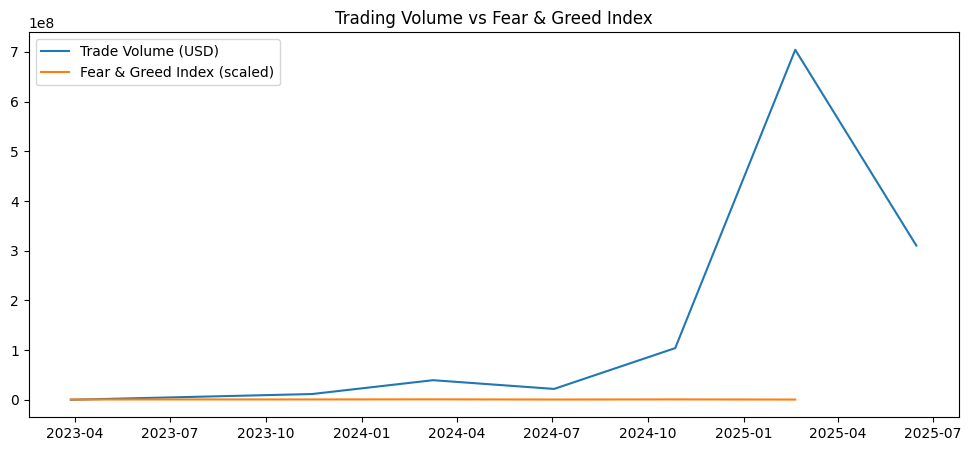

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/Trading_Volume_vs_Fear&Greed_Index.png


In [9]:
daily_trades = merged_df.groupby("date").agg(
    trades=("Size USD","count"),
    volume_usd=("Size USD","sum"),
    fear_greed=("value","first")
).reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_trades["date"], daily_trades["volume_usd"], label="Trade Volume (USD)")
plt.plot(daily_trades["date"], daily_trades["fear_greed"]*10000, label="Fear & Greed Index (scaled)")
plt.legend()
plt.title("Trading Volume vs Fear & Greed Index")
file_path = os.path.join(output_dir, "Trading_Volume_vs_Fear&Greed_Index.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

print(f" Plot saved to: {file_path}")

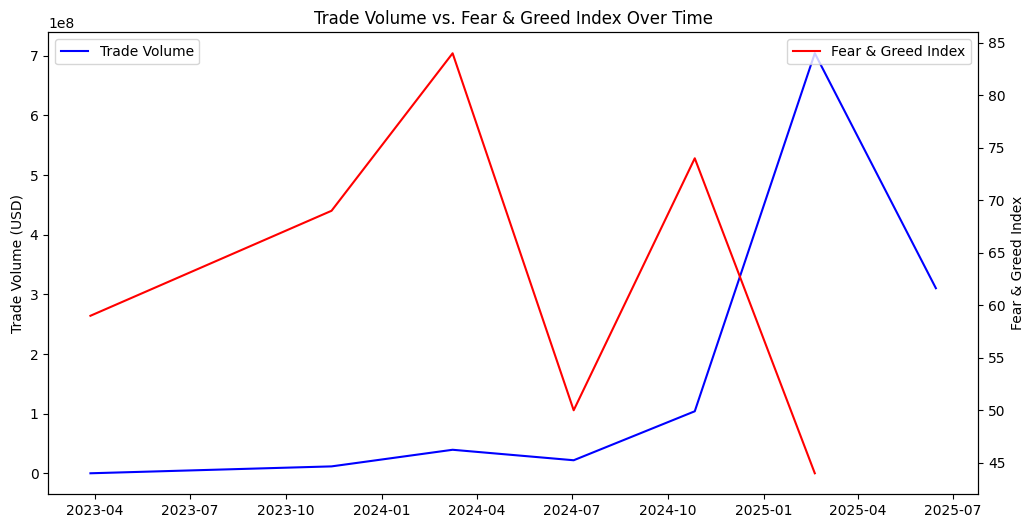

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/Trading_Volume_vs_Fear&Greed_Index_over_Time.png


In [10]:
import matplotlib.pyplot as plt

# --- Create Date column ---
merged_df['Date'] = merged_df['Timestamp'].dt.date

# --- Daily trader volume ---
trader_daily = merged_df.groupby('Date')['Size USD'].sum().reset_index()

# --- Daily fear & greed (already in merged_df) ---
fg_daily = merged_df.groupby('Date')['value'].mean().reset_index()

# --- Merge ---
daily = pd.merge(trader_daily, fg_daily, on='Date')

# --- Plot ---
plt.figure(figsize=(12,6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(daily['Date'], daily['Size USD'], color='blue', label='Trade Volume')
ax2.plot(daily['Date'], daily['value'], color='red', label='Fear & Greed Index')

ax1.set_ylabel("Trade Volume (USD)")
ax2.set_ylabel("Fear & Greed Index")
plt.title("Trade Volume vs. Fear & Greed Index Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
file_path = os.path.join(output_dir, "Trading_Volume_vs_Fear&Greed_Index_over_Time.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

print(f" Plot saved to: {file_path}")

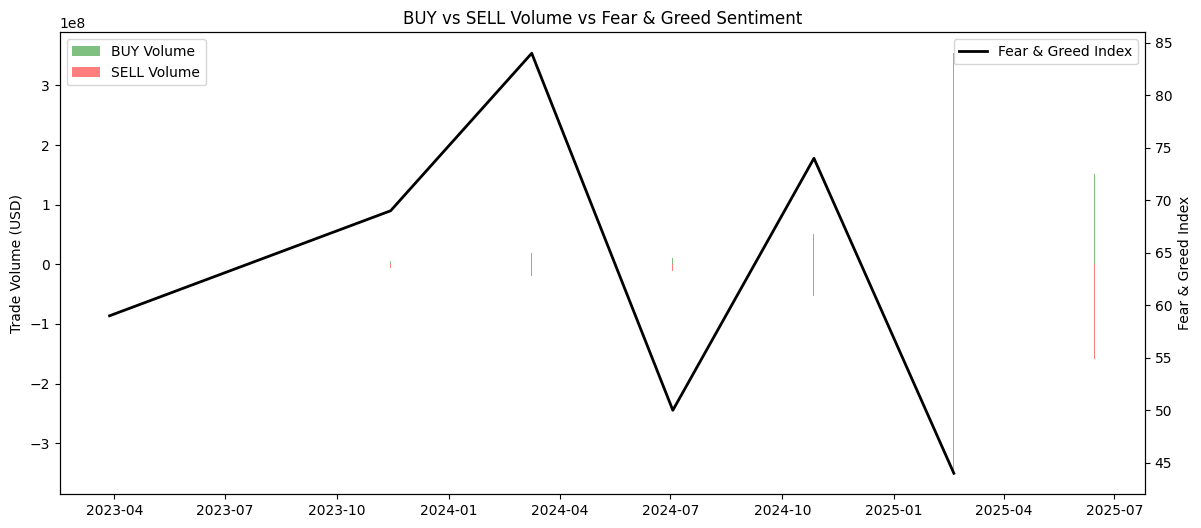

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/BUY_vs_SELL_Volume_vs_Fear&Greed_Sentiment.png


In [11]:
# --- Separate BUY and SELL daily volumes ---
buy_daily = merged_df[merged_df['Side'] == 'BUY'].groupby('Date')['Size USD'].sum().reset_index()
sell_daily = merged_df[merged_df['Side'] == 'SELL'].groupby('Date')['Size USD'].sum().reset_index()

# Rename columns for clarity
buy_daily.rename(columns={'Size USD': 'BUY Volume'}, inplace=True)
sell_daily.rename(columns={'Size USD': 'SELL Volume'}, inplace=True)

# Merge them together
volume_daily = pd.merge(buy_daily, sell_daily, on='Date', how='outer').fillna(0)

# Add daily sentiment (Fear & Greed Index value)
fg_daily = merged_df.groupby('Date')['value'].mean().reset_index()
volume_daily = pd.merge(volume_daily, fg_daily, on='Date')

# --- Plot ---
plt.figure(figsize=(14,6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot BUY & SELL bars
ax1.bar(volume_daily['Date'], volume_daily['BUY Volume'],
        color='green', alpha=0.5, label='BUY Volume')
ax1.bar(volume_daily['Date'], -volume_daily['SELL Volume'],
        color='red', alpha=0.5, label='SELL Volume')  # negative for contrast

# Plot Fear & Greed index
ax2.plot(volume_daily['Date'], volume_daily['value'],
         color='black', linewidth=2, label='Fear & Greed Index')

ax1.set_ylabel("Trade Volume (USD)")
ax2.set_ylabel("Fear & Greed Index")
plt.title("BUY vs SELL Volume vs Fear & Greed Sentiment")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
file_path = os.path.join(output_dir, "BUY_vs_SELL_Volume_vs_Fear&Greed_Sentiment.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Plot saved to: {file_path}")

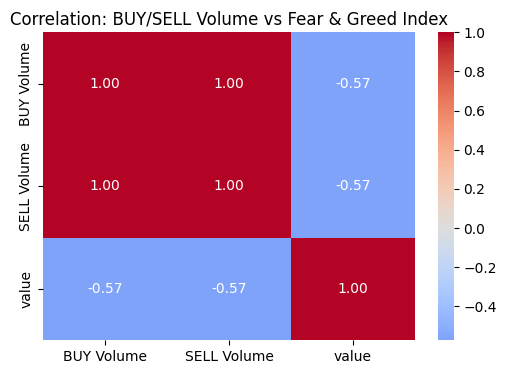

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/Correlation_BUY_SELL_Volume_vs_Fear&Greed_Index.png


In [12]:
import seaborn as sns

# Select only the relevant numeric columns
corr_data = volume_daily[['BUY Volume', 'SELL Volume', 'value']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# --- Plot heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: BUY/SELL Volume vs Fear & Greed Index")
file_path = os.path.join(output_dir, "Correlation_BUY_SELL_Volume_vs_Fear&Greed_Index.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Plot saved to: {file_path}")


In [13]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'value', 'Date'],
      dtype='object')


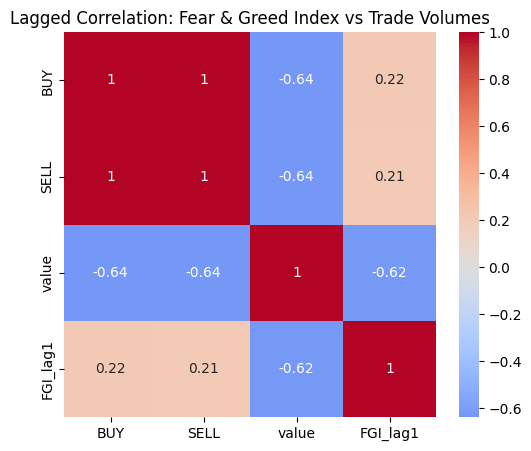

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/lagged_correlation_fgi_vs_trades.png


In [14]:
# Step 1: Add a Date column (from Timestamp)
merged_df['Date'] = pd.to_datetime(merged_df['Timestamp']).dt.date

# Step 2: Aggregate BUY and SELL volumes per day
daily_trades = merged_df.groupby(['Date', 'Side'])['Size USD'].sum().unstack(fill_value=0).reset_index()

# Step 3: Merge with daily avg Fear & Greed index
fg_daily = merged_df.groupby('Date')['value'].mean().reset_index()

daily_merged = pd.merge(daily_trades, fg_daily, on='Date')

# Step 4: Add lagged Fear & Greed index (shift by 1 day)
daily_merged['FGI_lag1'] = daily_merged['value'].shift(1)
daily_merged = daily_merged.dropna()

# Step 5: Correlation
corr_lag = daily_merged[['BUY', 'SELL', 'value', 'FGI_lag1']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(corr_lag, annot=True, cmap='coolwarm', center=0)
plt.title("Lagged Correlation: Fear & Greed Index vs Trade Volumes")
file_path = os.path.join(output_dir, "lagged_correlation_fgi_vs_trades.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Plot saved to: {file_path}")



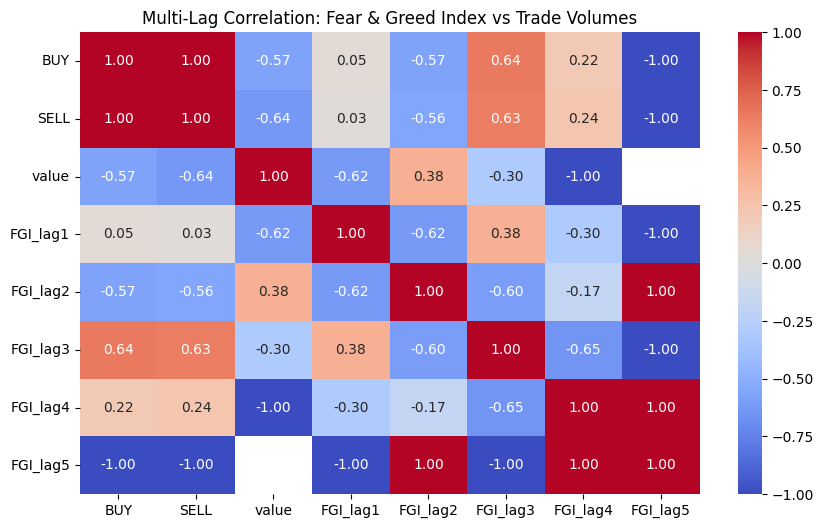

 Plot saved to: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/multi_lag_correlation_fgi_vs_trades.png


In [15]:
# Aggregate BUY/SELL volumes by day
daily_volumes = merged_df.pivot_table(
    index='date',
    columns='Side',
    values='Size USD',
    aggfunc='sum'
).reset_index()

# Merge with FGI daily averages
fg_daily = merged_df.groupby('date')['value'].mean().reset_index()

# Combine into one DataFrame
lag_df = pd.merge(daily_volumes, fg_daily, on='date', how='inner')

# Create multiple FGI lags (1 to 5 days)
for lag in range(1, 6):
    lag_df[f'FGI_lag{lag}'] = lag_df['value'].shift(lag)

# Now compute correlation
lag_cols = ['BUY', 'SELL', 'value'] + [f'FGI_lag{i}' for i in range(1, 6)]
corr_matrix = lag_df[lag_cols].corr()

# Display correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Multi-Lag Correlation: Fear & Greed Index vs Trade Volumes")
file_path = os.path.join(output_dir, "multi_lag_correlation_fgi_vs_trades.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Plot saved to: {file_path}")



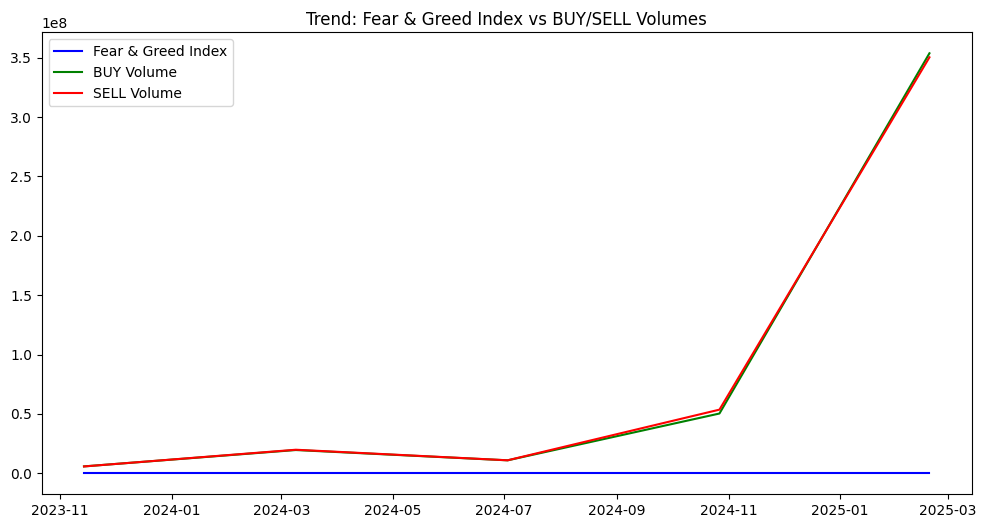

In [16]:
plt.figure(figsize=(12,6))
plt.plot(daily_merged['Date'], daily_merged['value'], label="Fear & Greed Index", color="blue")
plt.plot(daily_merged['Date'], daily_merged['BUY'], label="BUY Volume", color="green")
plt.plot(daily_merged['Date'], daily_merged['SELL'], label="SELL Volume", color="red")
plt.legend()
plt.title("Trend: Fear & Greed Index vs BUY/SELL Volumes")
file_path = os.path.join(output_dir, "trend_fgi_vs_volumes.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()


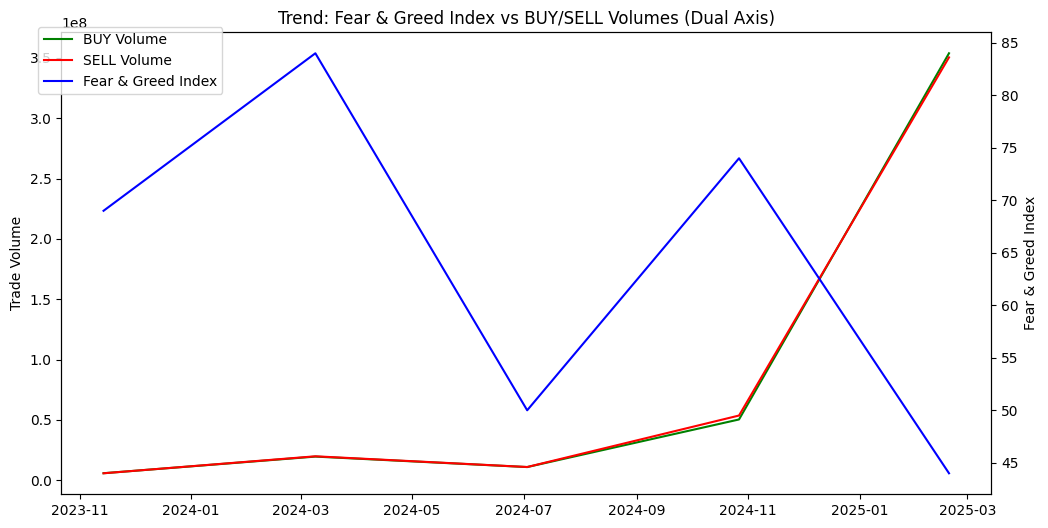

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_merged['Date'], daily_merged['BUY'], label="BUY Volume", color="green")
ax1.plot(daily_merged['Date'], daily_merged['SELL'], label="SELL Volume", color="red")
ax1.set_ylabel("Trade Volume")

ax2 = ax1.twinx()
ax2.plot(daily_merged['Date'], daily_merged['value'], label="Fear & Greed Index", color="blue")
ax2.set_ylabel("Fear & Greed Index")

fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title("Trend: Fear & Greed Index vs BUY/SELL Volumes (Dual Axis)")
file_path = os.path.join(output_dir, "trend_dual_axis.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()


In [18]:
import pandas as pd

# --- Step 1: Prepare fg (Fear & Greed) daily data ---
# Step 1: Prepare hist daily data
hist['date'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date


fg_daily = fg.groupby('date', as_index=False)['value'].mean()   # avg FGI per day

# --- Step 2: Prepare hist (trader activity) daily data ---
hist['date'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# aggregate trader behavior daily
hist_daily = hist.groupby(['date']).agg({
    'Size USD': 'sum',
    'Closed PnL': 'sum',
    'Start Position': 'mean'
}).reset_index()


# Also calculate BUY/SELL counts separately
buy_sell_daily = hist.groupby(['date','Direction']).size().unstack(fill_value=0).reset_index()

hist_daily = hist_daily.merge(buy_sell_daily, on='date', how='left')

# --- Step 3: Merge both datasets ---
daily_merged = pd.merge(hist_daily, fg_daily, on='date', how='inner')

print(" Daily merged dataset shape:", daily_merged.shape)
print(daily_merged.head())


 Daily merged dataset shape: (479, 17)
         date   Size USD  Closed PnL  Start Position  Auto-Deleveraging  Buy  \
0  2023-05-01     477.00    0.000000        0.091933                  0    0   
1  2023-12-05   50005.83    0.000000        2.513867                  0    0   
2  2023-12-14  113203.35 -205.434737     -132.574302                  0    0   
3  2023-12-15   10609.95  -24.632034    -2440.000000                  0    0   
4  2023-12-16   15348.77    0.000000    12124.666667                  0    0   

   Close Long  Close Short  Liquidated Isolated Short  Long > Short  \
0           0            0                          0             0   
1           0            0                          0             0   
2           4            2                          0             0   
3           0            2                          0             0   
4           0            0                          0             0   

   Open Long  Open Short  Sell  Settlement  Short > L

In [19]:
print(daily_merged.shape)

(479, 17)


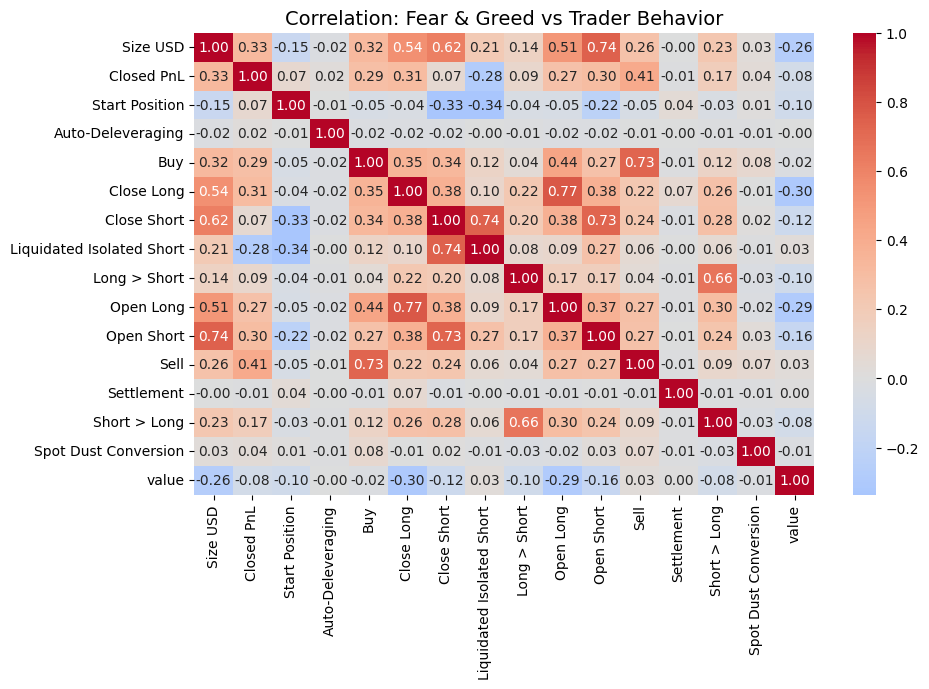

 Correlation heatmap saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/correlation_heatmap.png


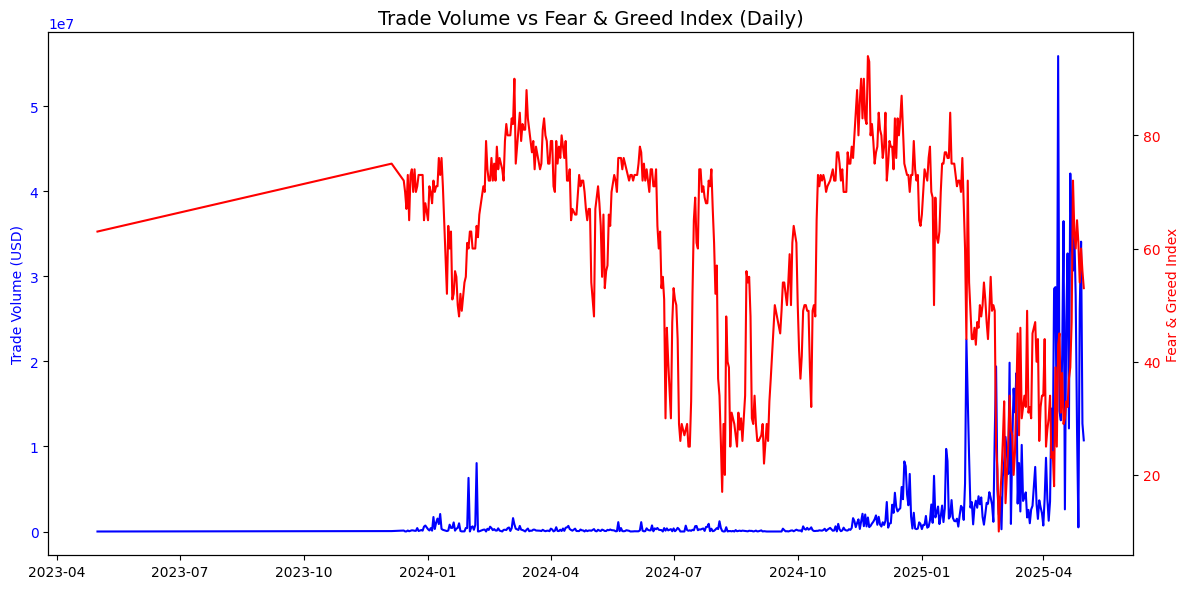

 Trend plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/trade_volume_vs_fgi.png


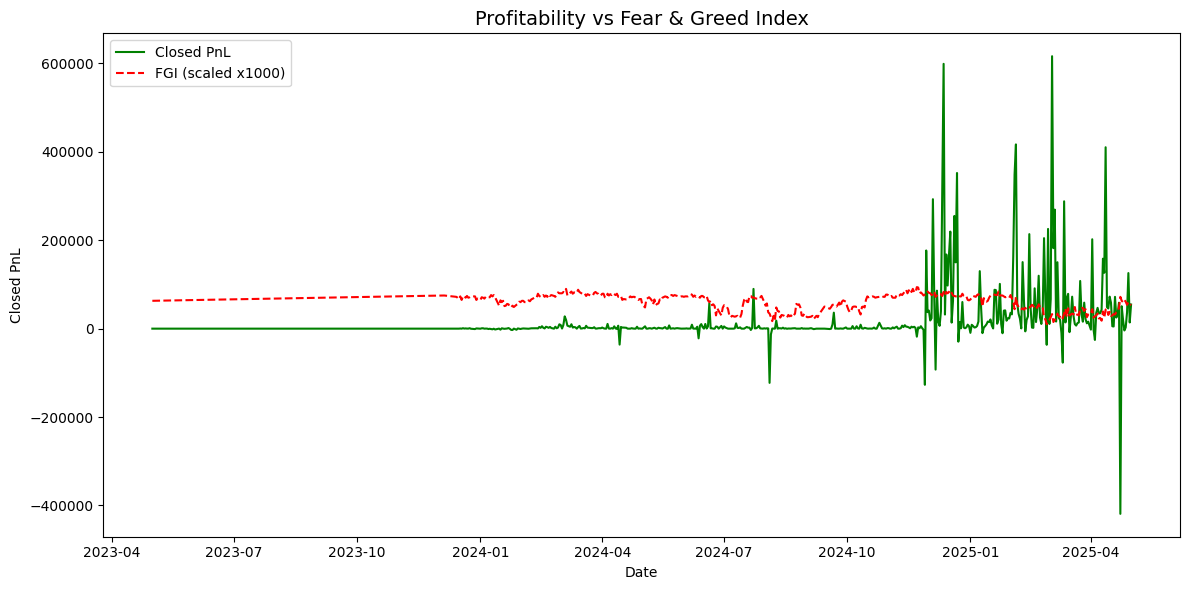

 Profitability vs FGI plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/profitability_vs_fgi.png


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define output path inside Google Drive
output_dir = "/content/drive/MyDrive/ds_Amgoth_Naresh/outputs"
os.makedirs(output_dir, exist_ok=True)

# --- Step 4.1: Correlation Heatmap ---
plt.figure(figsize=(10,6))
corr = daily_merged.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation: Fear & Greed vs Trader Behavior", fontsize=14)
file_path_corr = os.path.join(output_dir, "correlation_heatmap.png")
plt.savefig(file_path_corr, dpi=300, bbox_inches="tight")
plt.show()
print(f" Correlation heatmap saved at: {file_path_corr}")


# --- Step 4.2: Trade Volume vs FGI Trend ---
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_merged['date'], daily_merged['Size USD'], color="blue", label="Trade Volume (USD)")
ax1.set_ylabel("Trade Volume (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(daily_merged['date'], daily_merged['value'], color="red", label="Fear & Greed Index")
ax2.set_ylabel("Fear & Greed Index", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Trade Volume vs Fear & Greed Index (Daily)", fontsize=14)
fig.tight_layout()

file_path_trend = os.path.join(output_dir, "trade_volume_vs_fgi.png")
plt.savefig(file_path_trend, dpi=300, bbox_inches="tight")
plt.show()
print(f" Trend plot saved at: {file_path_trend}")


# --- Step 4.3: Profitability vs FGI ---
plt.figure(figsize=(12,6))
plt.plot(daily_merged['date'], daily_merged['Closed PnL'], label="Closed PnL", color="green")
plt.plot(daily_merged['date'], daily_merged['value']*1000, label="FGI (scaled x1000)", color="red", linestyle="--")
plt.title("Profitability vs Fear & Greed Index", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.legend()
plt.tight_layout()

file_path_pnl = os.path.join(output_dir, "profitability_vs_fgi.png")
plt.savefig(file_path_pnl, dpi=300, bbox_inches="tight")
plt.show()
print(f" Profitability vs FGI plot saved at: {file_path_pnl}")


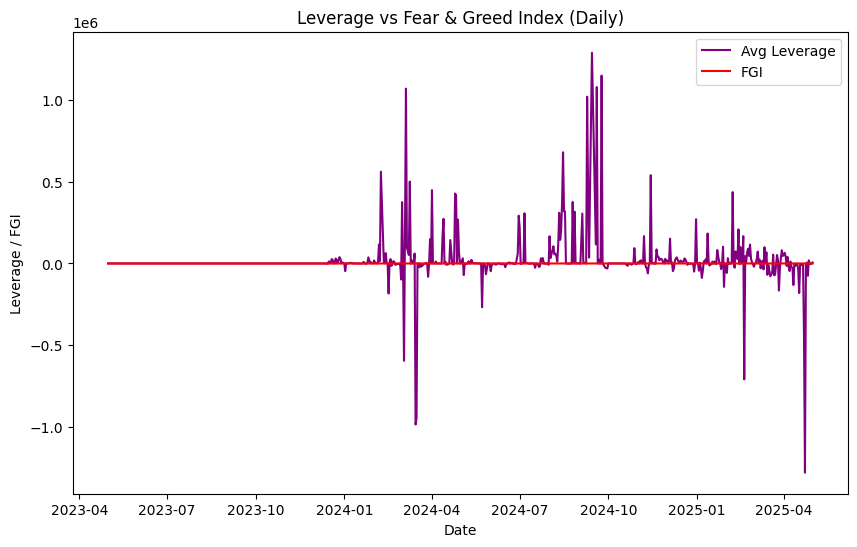

Leverage vs FGI plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/leverage_vs_fgi.png


In [30]:
# Step 5a: Leverage vs Fear & Greed Index
plt.figure(figsize=(10,6))
plt.plot(daily_merged['date'], daily_merged['Start Position'], label="Avg Leverage", color="purple")
plt.plot(daily_merged['date'], daily_merged['value'], label="FGI", color="red")
plt.title("Leverage vs Fear & Greed Index (Daily)")
plt.xlabel("Date")
plt.ylabel("Leverage / FGI")
plt.legend()
file_path = os.path.join(output_dir, "leverage_vs_fgi.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"Leverage vs FGI plot saved at: {file_path}")


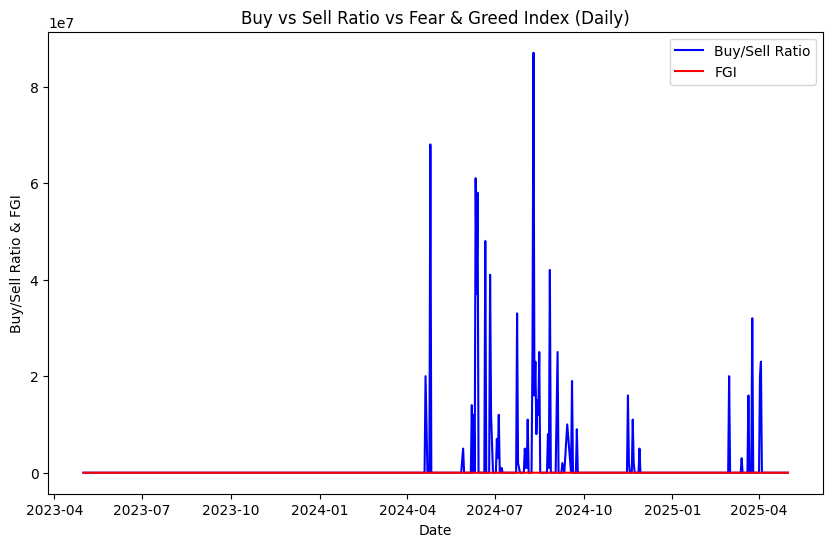

Buy vs Sell ratio vs FGI plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/buy_sell_ratio_vs_fgi.png


In [31]:
# Step 5b: Buy vs Sell ratio vs Fear & Greed Index
daily_merged['Buy_Sell_Ratio'] = daily_merged['Buy'] / (daily_merged['Sell'] + 1e-6)  # avoid division by zero

plt.figure(figsize=(10,6))
plt.plot(daily_merged['date'], daily_merged['Buy_Sell_Ratio'], label="Buy/Sell Ratio", color="blue")
plt.plot(daily_merged['date'], daily_merged['value'], label="FGI", color="red")
plt.title("Buy vs Sell Ratio vs Fear & Greed Index (Daily)")
plt.xlabel("Date")
plt.ylabel("Buy/Sell Ratio & FGI")
plt.legend()
file_path = os.path.join(output_dir, "buy_sell_ratio_vs_fgi.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"Buy vs Sell ratio vs FGI plot saved at: {file_path}")


In [36]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.formula.api as smf

# ===============================
# Step 5a: Granger Causality Tests
# ===============================

print("\n=== Granger Causality Tests ===")

# Test if FGI predicts Trade Volume (Size USD)
print("\nDoes FGI predict Trade Volume?")
grangercausalitytests(daily_merged[['Size USD', 'value']], maxlag=5, verbose=True)

# Test if FGI predicts Profitability (Closed PnL)
print("\nDoes FGI predict Profitability?")
grangercausalitytests(daily_merged[['Closed PnL', 'value']], maxlag=5, verbose=True)

# Test if FGI predicts Leverage (Start Position)
print("\nDoes FGI predict Leverage?")
grangercausalitytests(daily_merged[['Start Position', 'value']], maxlag=5, verbose=True)


# =========================================
# Step 5b: Simple Regression (OLS Analysis)
# =========================================

print("\n=== OLS Regressions (FGI as predictor) ===")

# Regression: Does FGI predict Trade Volume?
model_vol = smf.ols("Q('Size USD') ~ value", data=daily_merged).fit()
print("\nFGI → Trade Volume")
print(model_vol.summary())

# Regression: Does FGI predict Profitability?
model_pnl = smf.ols("Q('Closed PnL') ~ value", data=daily_merged).fit()
print("\nFGI → Profitability")
print(model_pnl.summary())

# Regression: Does FGI predict Leverage (Start Position)?
model_lev = smf.ols("Q('Start Position') ~ value", data=daily_merged).fit()
print("\nFGI → Leverage")
print(model_lev.summary())




=== Granger Causality Tests ===

Does FGI predict Trade Volume?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4831  , p=0.0022  , df_denom=475, df_num=1
ssr based chi2 test:   chi2=9.5430  , p=0.0020  , df=1
likelihood ratio test: chi2=9.4490  , p=0.0021  , df=1
parameter F test:         F=9.4831  , p=0.0022  , df_denom=475, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3777  , p=0.0350  , df_denom=472, df_num=2
ssr based chi2 test:   chi2=6.8270  , p=0.0329  , df=2
likelihood ratio test: chi2=6.7786  , p=0.0337  , df=2
parameter F test:         F=3.3777  , p=0.0350  , df_denom=472, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6020  , p=0.1881  , df_denom=469, df_num=3
ssr based chi2 test:   chi2=4.8778  , p=0.1810  , df=3
likelihood ratio test: chi2=4.8530  , p=0.1829  , df=3
parameter F test:         F=1.6020  , p=0.1881  , df_denom=469, df_num=3

Granger Causality
number of 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


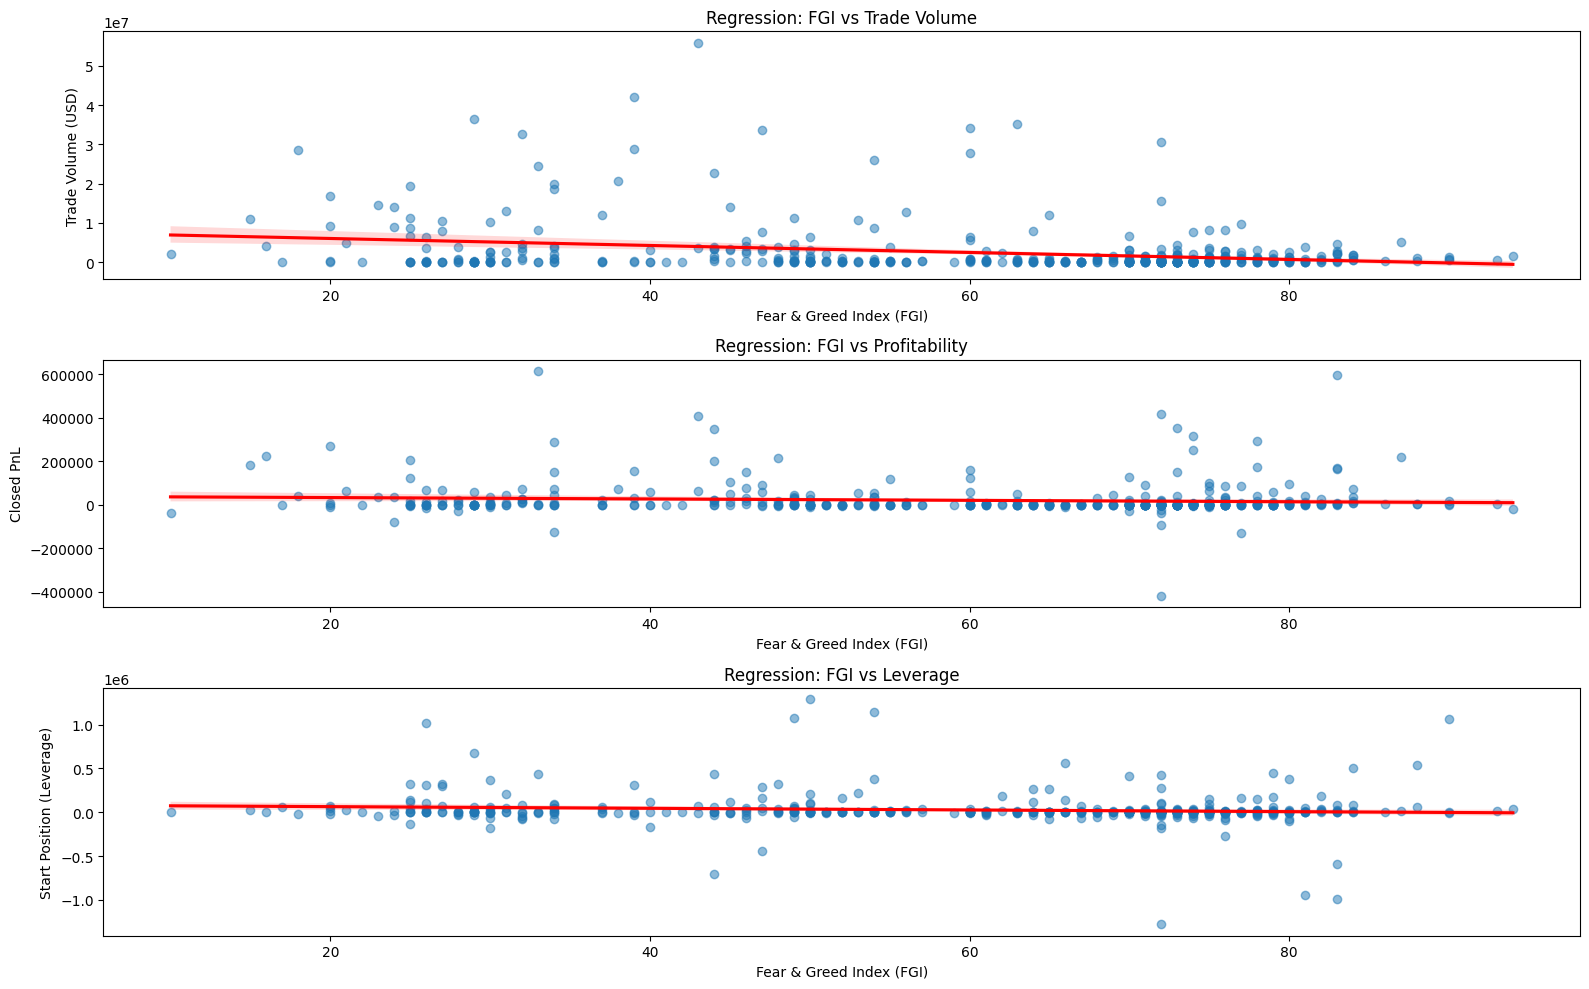

Regression plots saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/regression_fgi_relationships.png


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Step 5c: Regression Line Plots
# ===============================

plt.figure(figsize=(16, 10))

# --- Plot 1: FGI vs Trade Volume ---
plt.subplot(3, 1, 1)
sns.regplot(x="value", y="Size USD", data=daily_merged, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression: FGI vs Trade Volume")
plt.xlabel("Fear & Greed Index (FGI)")
plt.ylabel("Trade Volume (USD)")

# --- Plot 2: FGI vs Profitability ---
plt.subplot(3, 1, 2)
sns.regplot(x="value", y="Closed PnL", data=daily_merged, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression: FGI vs Profitability")
plt.xlabel("Fear & Greed Index (FGI)")
plt.ylabel("Closed PnL")

# --- Plot 3: FGI vs Leverage ---
plt.subplot(3, 1, 3)
sns.regplot(x="value", y="Start Position", data=daily_merged, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression: FGI vs Leverage")
plt.xlabel("Fear & Greed Index (FGI)")
plt.ylabel("Start Position (Leverage)")

plt.tight_layout()

# Save to Google Drive outputs folder
plot_path = f"{output_dir}/regression_fgi_relationships.png"
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"Regression plots saved at: {plot_path}")


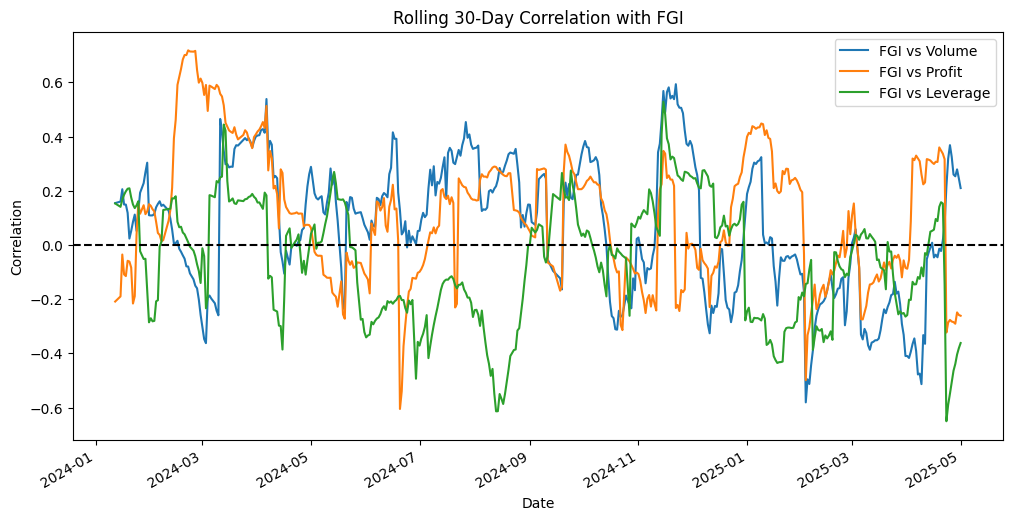

Rolling correlation plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/rolling_corr_fgi.png


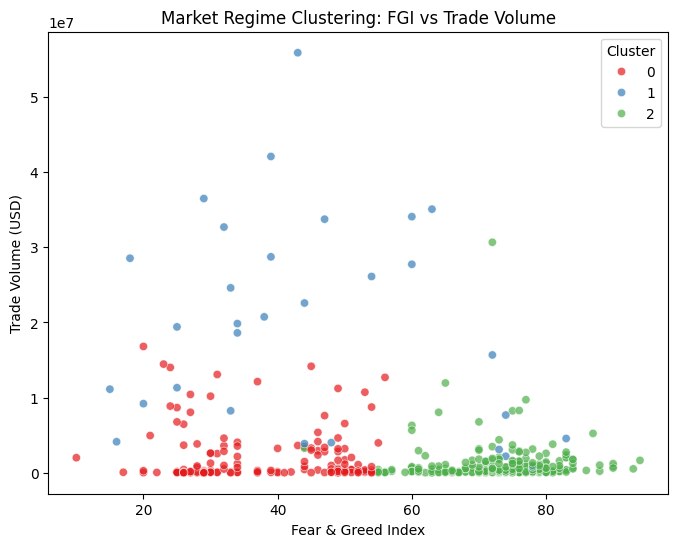

Cluster plot saved at: /content/drive/MyDrive/ds_Amgoth_Naresh/outputs/market_regime_clusters.png


In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ensure 'date' is datetime and sorted
daily_merged['date'] = pd.to_datetime(daily_merged['date'])
daily_merged = daily_merged.sort_values('date')

# ==========================
# Step 6A: Rolling Correlation
# ==========================
window = 30  # 30-day rolling correlation

# Set index to 'date' for rolling operations
dm_indexed = daily_merged.set_index("date")

plt.figure(figsize=(12,6))
dm_indexed['value'].rolling(window).corr(dm_indexed['Size USD']).plot(label="FGI vs Volume")
dm_indexed['value'].rolling(window).corr(dm_indexed['Closed PnL']).plot(label="FGI vs Profit")
dm_indexed['value'].rolling(window).corr(dm_indexed['Start Position']).plot(label="FGI vs Leverage")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.title(f"Rolling {window}-Day Correlation with FGI")
plt.ylabel("Correlation")
plt.xlabel("Date")

rolling_corr_path = f"{output_dir}/rolling_corr_fgi.png"
plt.savefig(rolling_corr_path, dpi=300)
plt.show()
print(f"Rolling correlation plot saved at: {rolling_corr_path}")


# ==========================
# Step 6B: Clustering
# ==========================
# Select features for clustering
features = daily_merged[['Size USD','Closed PnL','Start Position','value']].dropna().copy()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering (3 groups: Fear, Neutral, Greed regimes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clustering results
plt.figure(figsize=(8,6))
sns.scatterplot(data=features, x="value", y="Size USD", hue="Cluster", palette="Set1", alpha=0.7)
plt.title("Market Regime Clustering: FGI vs Trade Volume")
plt.xlabel("Fear & Greed Index")
plt.ylabel("Trade Volume (USD)")

cluster_path = f"{output_dir}/market_regime_clusters.png"
plt.savefig(cluster_path, dpi=300)
plt.show()
print(f"Cluster plot saved at: {cluster_path}")


In [39]:
daily_merged.head()

,date,Size USD,Closed PnL,Start Position,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion,value,Buy_Sell_Ratio
0,2023-05-01,477.00,0.000000,0.091933,0,0,0,0,0,0,3,0,0,0,0,0,63.0,0.0
1,2023-12-05,50005.83,0.000000,2.513867,0,0,0,0,0,0,7,2,0,0,0,0,75.0,0.0
2,2023-12-14,113203.35,-205.434737,-132.574302,0,0,4,2,0,0,3,2,0,0,0,0,72.0,0.0
3,2023-12-15,10609.95,-24.632034,-2440.000000,0,0,0,2,0,0,0,0,0,0,0,0,70.0,0.0
4,2023-12-16,15348.77,0.000000,12124.666667,0,0,0,0,0,0,3,0,0,0,0,0,67.0,0.0
